# PROYECTO FINAL

La empresa GoGreen Bikesharing se dedica al alquiler de bicicletas y posee datos tales como la cantidad de bicis alquiladas por usuarios registrados, la cantidad de alquileres realizados por usuarios puntuales, y la cantidad total. 

A estos datos se les añadió información meteorológica y el calendario de festivos.

Ahora buscan analizar cuáles son los aspectos que más influyen en la cantidad de bicis que van a alquilar en un día.

In [71]:
# Tratamiento de datos
import numpy as np
import pandas as pd
#import sidetable as stb

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
import sidetable as stb

# Asunciones y Preprocesamiento
from scipy import stats
import math
from scipy.stats import levene
#import researchpy as rp
from sklearn.preprocessing import StandardScaler
import itertools
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols
import researchpy as rp # chi square

#Linear Regresion con Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = False

In [72]:
df_bike = pd.read_csv("./EDA__parte_3.csv", index_col=0)
df_bike.sample(6)

,casual,registered,cnt,season_encoding,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,temp_interval,temp_interval_ord,hum,hum_interval,hum_interval_ord,windspeed,wind_interval,wind_num_encoding
603,989,5928,6917,3,1,8,27,0,1,1,1,28.8,very_high,5,73.0,high,4,8.625111,low,1
280,2235,3174,5409,3,0,10,8,0,6,0,1,21.4,medium,3,70.1,high,4,3.042081,very_low,0
698,362,5306,5668,4,1,11,30,0,5,1,1,12.2,low,2,65.0,high,4,3.917544,very_low,0
412,349,3805,4154,1,1,2,17,0,5,1,1,14.1,low,2,63.5,high,4,13.791682,low,1
351,220,2211,2431,4,0,12,18,0,0,0,1,9.8,low,2,58.6,high,4,11.375193,low,1
311,376,3829,4205,3,0,11,8,0,2,1,1,16.7,medium,3,72.2,high,4,4.625513,very_low,0


---------

# <font color = orange> REGRESIÓN LINEAL MULTIPLE

### Este DF por ahora debe contener nuestra variable respuesta y todas las variables predictivas.

- Vamos a ver la variable respuesta grafico y comprobar la normalidad = 'cnt'
- Vamos a ver graficos de variables predictivas
- Correlacion
- Covarianza
- Vamos a ver si cumplen las asunciones para hacer Anova



###  <font color = yellow> Opcion 

cnt + encoding + estandarizado minmax

    Este dataframe tiene variable respuesta, y las predictoras encoding como tipo objets y numericas que sin encoding.

In [73]:
df= df_bike.copy() # Voy a hacer una copia para no perder los datos por si necesita hacer OPCION 1

In [74]:
df.head()

,casual,registered,cnt,season_encoding,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,temp_interval,temp_interval_ord,hum,hum_interval,hum_interval_ord,windspeed,wind_interval,wind_num_encoding
0,331,654,985,1,0,1,1,0,6,0,2,14.1,low,2,80.6,very_high,5,10.749882,low,1
1,131,670,801,1,0,1,2,0,0,0,2,14.9,low,2,69.6,high,4,16.652113,medium,2
2,120,1229,1349,1,0,1,3,0,1,1,1,8.1,very_low,1,43.7,medium,3,16.636703,medium,2
3,108,1454,1562,2,0,1,4,0,2,1,1,8.2,very_low,1,59.0,high,4,10.739832,low,1
4,82,1518,1600,2,0,1,5,0,3,1,1,9.3,low,2,43.7,medium,3,12.522300,low,1


In [75]:
df.drop(['temp_interval', 'temp_interval_ord','hum_interval','hum_interval_ord', 'wind_interval', 'wind_num_encoding'],axis=1, inplace=True)
    

In [76]:
df.head()

,casual,registered,cnt,season_encoding,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,hum,windspeed
0,331,654,985,1,0,1,1,0,6,0,2,14.1,80.6,10.749882
1,131,670,801,1,0,1,2,0,0,0,2,14.9,69.6,16.652113
2,120,1229,1349,1,0,1,3,0,1,1,1,8.1,43.7,16.636703
3,108,1454,1562,2,0,1,4,0,2,1,1,8.2,59.0,10.739832
4,82,1518,1600,2,0,1,5,0,3,1,1,9.3,43.7,12.522300


In [77]:
df.info() #Correcto tenemos que volver a cambiar el tipo de cada columna 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   casual           730 non-null    int64  
 1   registered       730 non-null    int64  
 2   cnt              730 non-null    int64  
 3   season_encoding  730 non-null    int64  
 4   yr               730 non-null    int64  
 5   mnth             730 non-null    int64  
 6   day              730 non-null    int64  
 7   holiday          730 non-null    int64  
 8   weekday          730 non-null    int64  
 9   workingday       730 non-null    int64  
 10  weathersit       730 non-null    int64  
 11  temp             730 non-null    float64
 12  hum              730 non-null    float64
 13  windspeed        730 non-null    float64
dtypes: float64(3), int64(11)
memory usage: 85.5 KB


In [78]:
df.columns

Index(['casual', 'registered', 'cnt', 'season_encoding', 'yr', 'mnth', 'day',
       'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [79]:
df['season_encoding'] = df['season_encoding'].astype('category')  
df['yr'] = df['yr'].astype('category')  
df['mnth'] = df['mnth'].astype('category')  
df['day'] = df['day'].astype('category')  
df['holiday'] = df['holiday'].astype('category')  
df['weekday'] = df['weekday'].astype('category')  
df['workingday'] = df['workingday'].astype('category')  
df['weathersit'] = df['weathersit'].astype('category')  

### Variable respuesta - NORMALIDAD - SHAPIRO

    Nuestra variable respuesta es 'cnt', queremos ver cuantas reservas general según las variables predictoras.
    Parece que tenemos una distribución normal de nuestros datos.

ShapiroResult(statistic=0.9802490472793579, pvalue=2.313480784721378e-08)


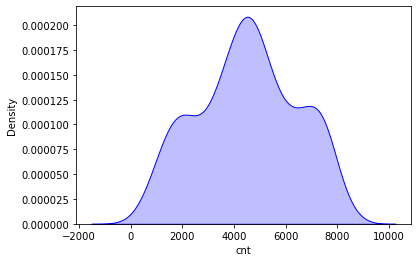

In [80]:
sns.distplot(
    df_bike.cnt, 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

print(stats.shapiro(df_bike["cnt"])) # EL p-value< 0.05 Quiere decir que la distribución es normal

### Variables predictoras CATEGORICAS - GRAFICO

    Estas son nuestras variables categoricas

In [81]:
categoricas = df.select_dtypes(include='category')
categoricas.head(1)

,season_encoding,yr,mnth,day,holiday,weekday,workingday,weathersit
0,1,0,1,1,0,6,0,2


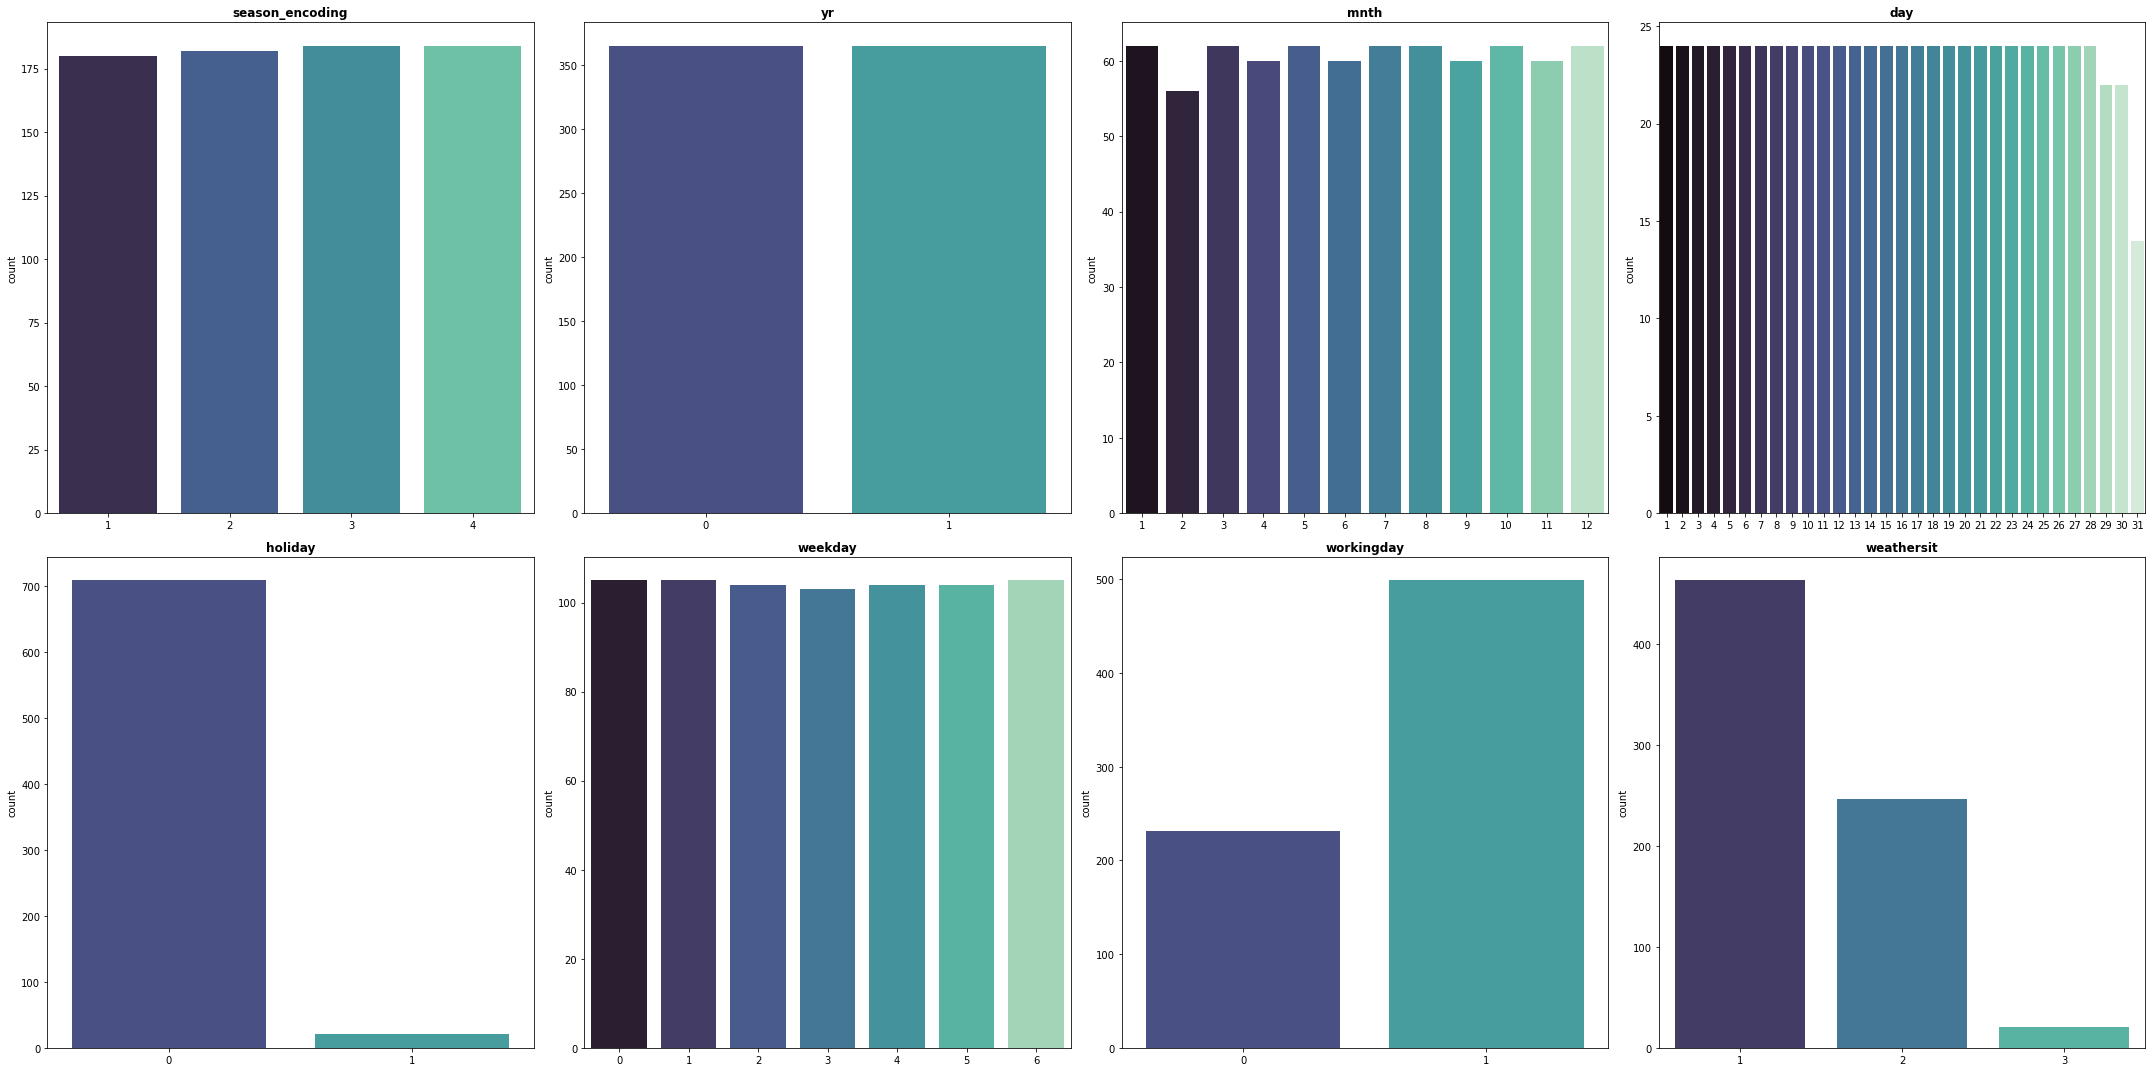

In [82]:
# Gráfico de relación entre variables predictoras y la variable a predecir CATEGORICAS
# ===================================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (30, 15))

axes = axes.flat

columnas_object = df.select_dtypes(include = "category").columns

for i, colum in enumerate(columnas_object):
    sns.countplot(df[colum], ax=axes[i], palette="mako")
    axes[i].set_title(colum, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
fig.tight_layout();



### Variables predictoras NUMERICAS - GRAFICO

    Estas son nuestras variables numéricas

In [83]:
numericas = df.select_dtypes(include = np.number)
numericas.head(1)

,casual,registered,cnt,temp,hum,windspeed
0,331,654,985,14.1,80.6,10.749882


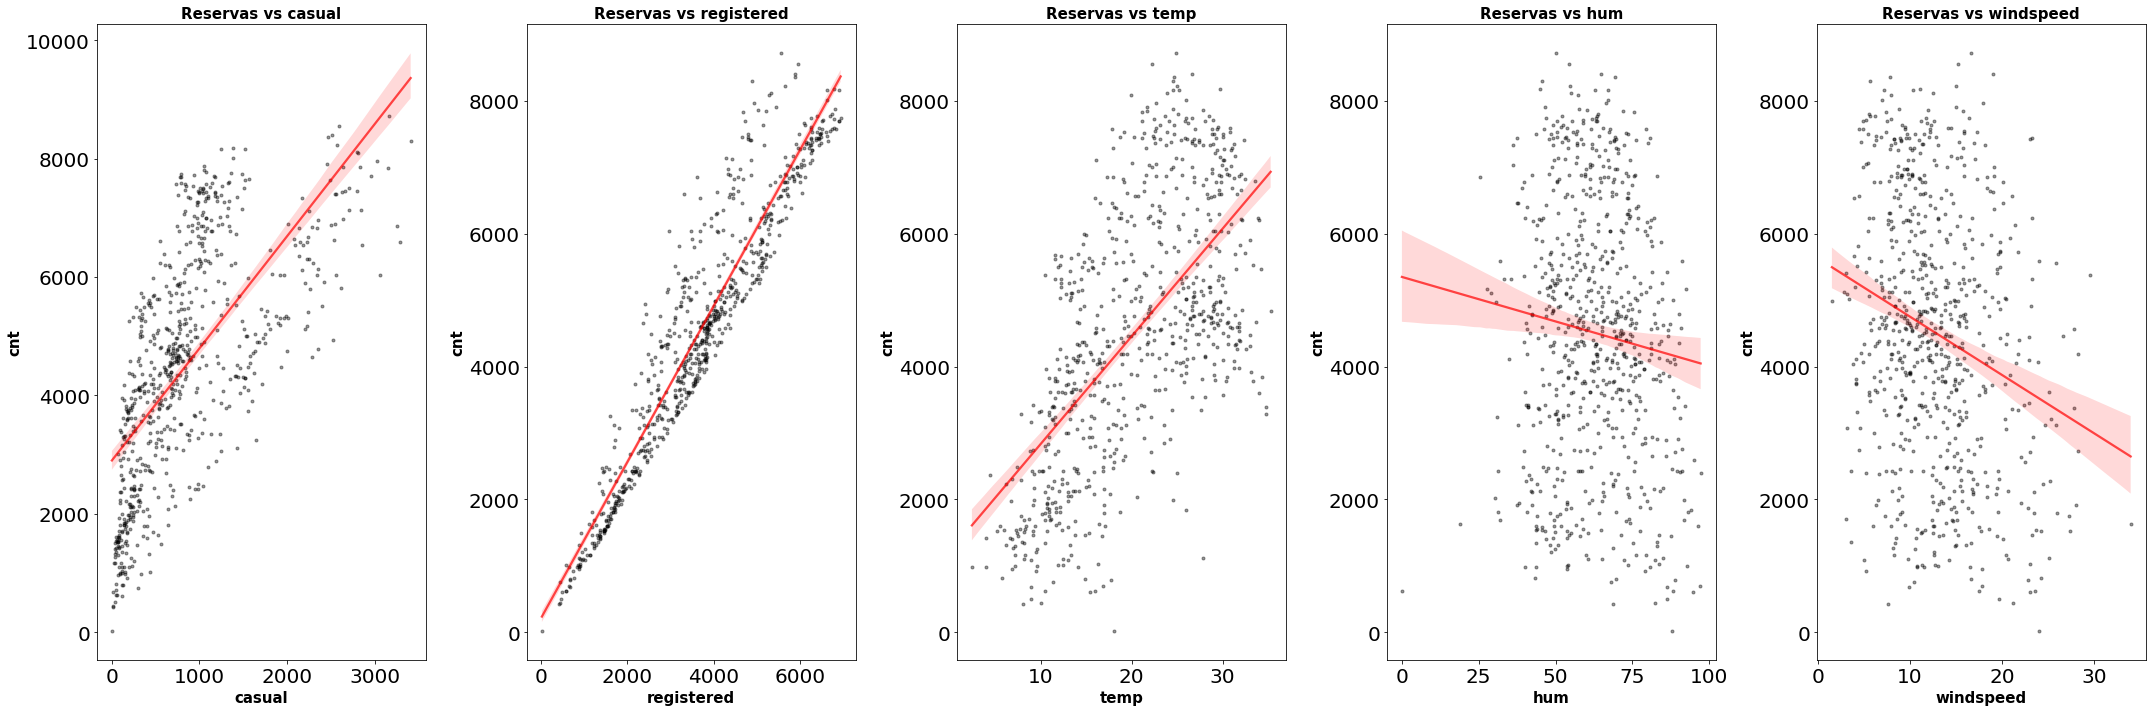

In [84]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (30, 10))

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("cnt") # excluimos nuestra variable respuesta. (No la necesitamos ahora

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df[colum], 
        y = df["cnt"], 
        color = "black", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Reservas vs {colum}", fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel(colum,  fontsize = 15, fontweight = "bold")
    axes[i].set_ylabel("cnt", fontsize = 15, fontweight = "bold")
    
fig.tight_layout();

### Vamos a comprobar la relación entre todas las variables

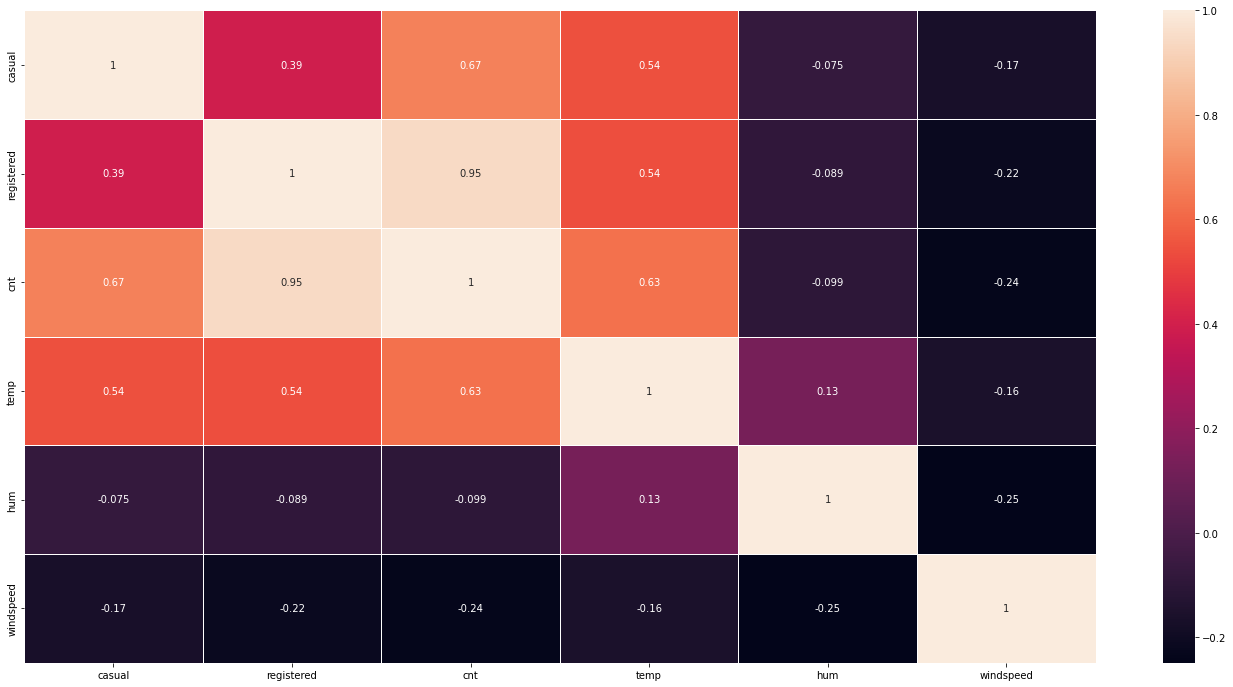

In [85]:
plt.figure(figsize = (24, 12))

corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

    CORRELACIÓN
        Vamos a ver la correlación entre las variables predictoras y que relación tienen tb con la respuesta.
        intervalo [-1 y 1]
	    r= 1 corr perfecta positiva (aumenta una , la otra tb aumenta)
	    r =0 no hay correlación
 	    r= -1 corr perfecta negativa (una aumenta y la otra disminuye)

    Correlación con respecto a la columna "cnt"

In [86]:
correlation = df.corr()['cnt'].abs().sort_values(ascending = False) #correlación solo te enseña numéricas, Pearson RESPECTO A LA COLUMNA "cnt"
correlation

cnt           1.000000
registered    0.945411
casual        0.672123
temp          0.627003
windspeed     0.235132
hum           0.098502
Name: cnt, dtype: float64

    Correlación entre todas las numéricas

In [87]:
numericas.corr() 

,casual,registered,cnt,temp,hum,windspeed
casual,1.000000,0.394137,0.672123,0.542824,-0.075259,-0.167995
registered,0.394137,1.000000,0.945411,0.539345,-0.089140,-0.217914
cnt,0.672123,0.945411,1.000000,0.627003,-0.098502,-0.235132
temp,0.542824,0.539345,0.627003,1.000000,0.128716,-0.158367
hum,-0.075259,-0.089140,-0.098502,0.128716,1.000000,-0.248582
windspeed,-0.167995,-0.217914,-0.235132,-0.158367,-0.248582,1.000000


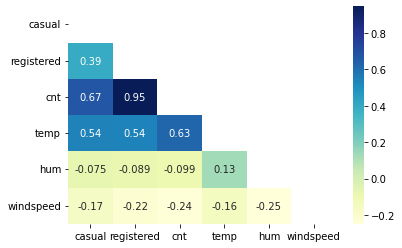

In [88]:
mask = np.triu(np.ones_like(numericas.corr(), dtype = np.bool))
sns.heatmap(numericas.corr(), 
           cmap = "YlGnBu", 
           annot = True, 
           mask =mask);


### Vamos a comprobar la relación que hay entre numericas

In [89]:
numericas2 = df.select_dtypes(include = np.number).drop("cnt", axis = 1)

    COVARIANZA
    ¿Ambas variables aumentan o disminuyen en la misma dirección o cuando una aumenta la otra disminuye?
        S> 0 COVARIANZA POSITIVA : Todos aumentan misma dirección ( a grandes valores de X, grandes valores de Y)
        S = 0 NO HAY RELACIÓN LINEAL
        S< 0 COVARIANZA NEGATIVA: Aumenta una y disminuye la otra (a grandes valores de X , pequeños valores de Y)

In [90]:
numericas2.cov() # vamos a ver si existe colinealidad entre mas medias de las variables predictoras

,casual,registered,temp,hum,windspeed
casual,471254.618141,4.220196e+05,2797.280226,-735.582158,-599.212506
registered,422019.595513,2.432847e+06,6314.994264,-1979.593043,-1766.034199
temp,2797.280226,6.314994e+03,56.350559,13.757125,-6.176868
hum,-735.582158,-1.979593e+03,13.757125,202.717828,-18.389602
windspeed,-599.212506,-1.766034e+03,-6.176868,-18.389602,26.996761


----

### Comprobar Outliers en este modelo

In [91]:
def detectar_outliers(lista_columnas, dataframe): 
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    return dicc_indices 

In [92]:
lista_columnas = list(numericas.columns)
lista_columnas

['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']

     Son pocos Outliers que no influyen en demasiado lo cambiamos por la mediana

In [93]:
ind = detectar_outliers(lista_columnas, df)
print(ind)

{'casual': [148, 183, 184, 196, 246, 281, 440, 446, 454, 455, 461, 468, 469, 475, 489, 496, 503, 504, 510, 511, 512, 517, 518, 524, 531, 532, 538, 539, 549, 559, 567, 580, 594, 608, 609, 616, 622, 629, 630, 636, 643, 657, 664, 679], 'hum': [49, 68], 'windspeed': [44, 49, 93, 94, 292, 382, 407, 420, 431, 432, 449, 665, 720]}


In [94]:
for key, values in ind.items():
    median = df[key].median()
     
    if key == "hum" or key == 'windspeed':
        for i in values: 
            df.loc[i,key] = median
    else:
        pass

# Comprobación de las asunciones - Las variables predictoras deben cumplir: Homocedasteidad, Independencia 

### ASUNCIÓN DE NORMALIDAD  

    Ya la hemos comprobado y nuestros datos son normales.

- Visualmente
- Test de Shapiro


| Test Shapiro  |  Resultado | Conclusión |
|---|---|---|
|  p-value > 0.05 | No significativo   | Datos  Normales|
|p-value < 0.05| Significativo| Datos No Normales |

In [95]:
stats.shapiro(df["cnt"]) # El p-value< 0.05 Quiere decir que la distribución es normal

ShapiroResult(statistic=0.9802490472793579, pvalue=2.313480784721378e-08)

### ASUNCIÓN DE HOMOCEDASTICIDAD (Levene)

Las varianzas no difieren entre las distintas categorías de nuestros datos


| Test Levene  |  Resultado | Conclusión   |
|---|---|---|
|  p-value > 0.05 | No significativo   | Cumple asunción, tienen varianzas similares|
|p-value < 0.05| Significativo| No cumple asunción, no tienen varianzas similares |

    - Variables Categoricas -

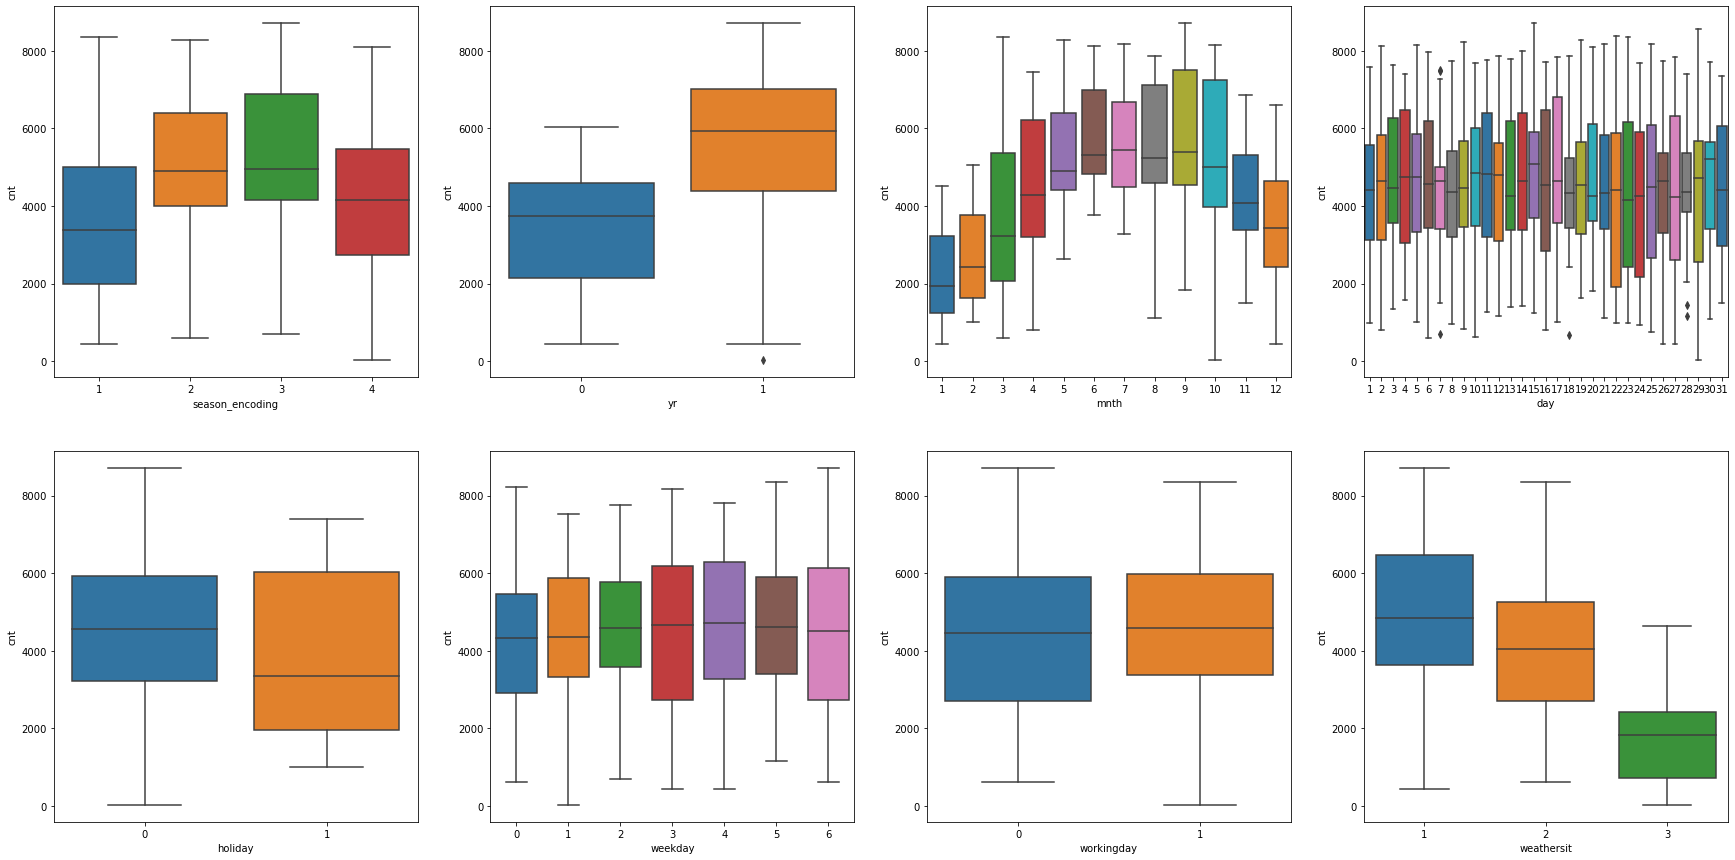

In [96]:
fig, axes = plt.subplots(nrows = 2, ncols = 4 ,figsize = (30, 15))

axes = axes.flat

colum_cat = df.select_dtypes(include = ['category']).columns

for i, col in enumerate(colum_cat):
    sns.boxplot(
        x = col,
        y = 'cnt',
        data = df,
        palette = 'tab10',
        ax = axes[i]

    )

                                                        --TEST LEVENE PARA CADA VARIABLE CATEGORICA PREDICTORA--

In [97]:
#Para desglosar cada una de las columnas, hacemos test de levene a cada una
def datos_test_levene (columna, df):
    valores = df[columna].unique()
    d = {}

    for x in valores:
        d['{0}'.format(x)] = df[df[columna] == x]['cnt']
    return d

In [98]:
# 8 variables categoricas predictoras
season = datos_test_levene('season_encoding', df)
year = datos_test_levene('yr', df)
month = datos_test_levene('mnth', df)
day = datos_test_levene('day', df)
holiday = datos_test_levene('holiday', df)
weekday =  datos_test_levene('weekday', df)
workingday = datos_test_levene('workingday', df)
weathersit = datos_test_levene('weathersit', df)

        --NO CUMPLEN--

In [99]:
levene_temp_interval = stats.levene(year['0'], year['1'], center='median')
levene_temp_interval # NO CUMPLE

LeveneResult(statistic=13.553593496753745, pvalue=0.0002489869491449798)

In [147]:
levene_workingday = stats.levene(workingday['0'], workingday['1'], center='median')
levene_workingday # NO CUMPLE

LeveneResult(statistic=4.460702577469021, pvalue=0.03502326959654844)

    --SI CUMPLEN --

In [146]:
levene_month = stats.levene(month['1'], month['2'],month['3'],month['4'],month['5'],month['6'],month['1'],month['7'],month['1'],month['8'],month['9'],month['10'],month['11'],month['12'], center='median')
levene_month # SI CUMPLE

LeveneResult(statistic=5.787944098760116, pvalue=2.73789175494516e-10)

In [102]:
levene_season = stats.levene(season['1'], season['2'], season['3'], season['4'], center='median')
levene_season # SI CUMPLE

LeveneResult(statistic=1.7590626071065214, pvalue=0.15360584747469838)

In [148]:
levene_day = stats.levene(day['1'], day['2'],day['3'],day['4'],day['5'],day['6'],day['1'],day['7'],day['1'],day['8'],day['9'],day['10'],day['11'],day['12'],
 day['13'], day['14'],day['15'],day['16'],day['17'],day['18'],day['19'],day['20'],day['21'],day['22'],day['23'],day['24'],day['25'],day['26'],
 day['27'], day['28'],day['29'],day['30'],day['31'],center='median')
levene_day # SI CUMPLE

LeveneResult(statistic=0.5456780499569595, pvalue=0.9815493458112784)

In [149]:
levene_holiday = stats.levene(holiday['0'], holiday['1'], center='median')
levene_holiday # SI CUMPLE

LeveneResult(statistic=0.7261499110317795, pvalue=0.39441424379573353)

In [150]:
levene_weekday = stats.levene(weekday['0'], weekday['1'],weekday['2'],weekday['3'],weekday['4'],weekday['5'],weekday['6'], center='median')
levene_weekday # SI CUMPLE

LeveneResult(statistic=1.496581827336433, pvalue=0.17647662349169893)

In [151]:
levene_weathersit = stats.levene(weathersit['1'], weathersit['2'], weathersit['3'],center='median')
levene_weathersit # SI CUMPLE

LeveneResult(statistic=2.981948873358019, pvalue=0.05131438057388725)

    Numéricas

In [107]:

# creamos un diccionario para almacenar los resultados de los test
resultados = {}

# seleccionamos solo las columnas numéricas y eliminamos la columna de precio
numericas_col = df.select_dtypes(include = np.number).drop("cnt", axis = 1).columns

#iteremos por la lista de las columnas numéricas
for col in numericas_col:
    # calculamos el p-valor de test
    statistic, p_val = levene(df[col], df.cnt, center='median')
    # lo almacenamos en el charges
    resultados[col] = p_val

                    --  SI CUMPLEN TODAS --

In [108]:
resultados 

{'casual': 3.031094721085453e-106,
 'registered': 3.756413456870291e-09,
 'temp': 2.483823693494982e-220,
 'hum': 2.4852444623529654e-219,
 'windspeed': 6.996761844872213e-221}

## Asunción independencia (Chi-Cuadrado)


| Test Independencia |  Resultado | Conclusión   |
|---|---|---|
|  p-value > 0.05 | No significativo   | Cumple asunción, tienen varianzas similares|
|p-value < 0.05| Significativo| No cumple asunción, no tienen varianzas similares |

In [109]:
columnas = df.columns

In [156]:
combinaciones = list(itertools.combinations(columnas, 2))
combinaciones[13]

('registered', 'cnt')

In [162]:
combinaciones = list(itertools.combinations(columnas, 2))
combinaciones_cnt= combinaciones[25:36]#, combinaciones[1], combinaciones[13] # ya solo te muestra con respecto a "cnt"
combinaciones_cnt

[('cnt', 'season_encoding'),
 ('cnt', 'yr'),
 ('cnt', 'mnth'),
 ('cnt', 'day'),
 ('cnt', 'holiday'),
 ('cnt', 'weekday'),
 ('cnt', 'workingday'),
 ('cnt', 'weathersit'),
 ('cnt', 'temp'),
 ('cnt', 'hum'),
 ('cnt', 'windspeed')]

    Test Chi Cuadrado
    Kramer: 
    de 0-0,1: no hay independencia
    de 0,1 - 0,3 independencia baja
    0,3 a 0,5 independencia moderada
    0,5+ independencia alta


In [163]:
for par in combinaciones_cnt:
    crosstab, test_results, expected = rp.crosstab(df[par[0]], df[par[1]],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
    print("---------------------------------", par[0], par[1], "---------------------------------")
    print(test_results) #todas son independientes

--------------------------------- cnt season_encoding ---------------------------------
                   Chi-square test    results
0  Pearson Chi-square ( 2082.0) =   2089.9375
1                       p-value =      0.4470
2                    Cramer's V =      0.9769
--------------------------------- cnt yr ---------------------------------
                  Chi-square test   results
0  Pearson Chi-square ( 694.0) =   706.0000
1                      p-value =     0.3676
2                   Cramer's V =     0.9834
--------------------------------- cnt mnth ---------------------------------
                   Chi-square test    results
0  Pearson Chi-square ( 7634.0) =   7636.3074
1                       p-value =      0.4904
2                    Cramer's V =      0.9752
--------------------------------- cnt day ---------------------------------
                    Chi-square test     results
0  Pearson Chi-square ( 20820.0) =   20849.4399
1                        p-value =       0.4

# ANOVA

    Ya podemos pasar a la ANOVA después de comprobar si las variables predictoras cumplen las asunciones

In [164]:
df.columns

Index(['casual', 'registered', 'cnt', 'season_encoding', 'yr', 'mnth', 'day',
       'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum',
       'windspeed'],
      dtype='object')

    TEner en cuenta que no está registred!!! Cambia mucho

In [182]:
lm = ols('cnt ~ casual +  season_encoding + yr + mnth + day + holiday + weekday + workingday + weathersit + temp + hum +  windspeed' , data=df).fit()
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
season_encoding,3.0,3.925809,1.308603,262.807410,9.232468e-113
yr,1.0,11.739237,11.739237,2357.596632,8.943830e-222
mnth,11.0,10.329327,0.939030,188.585804,6.726230e-197
day,30.0,0.829097,0.027637,5.550266,3.255271e-18
holiday,1.0,0.110602,0.110602,22.212193,2.969398e-06
weekday,6.0,0.205824,0.034304,6.889303,4.102127e-07
workingday,1.0,0.014560,0.014560,2.924157,8.772510e-02
weathersit,2.0,2.303277,1.151638,231.284091,3.964787e-77
casual,1.0,3.094956,3.094956,621.561475,1.318961e-97
temp,1.0,0.165304,0.165304,33.198030,1.268586e-08


In [183]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     113.7
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          3.36e-307
Time:                        17:35:46   Log-Likelihood:                 930.33
No. Observations:                 730   AIC:                            -1743.
Df Residuals:                     671   BIC:                            -1472.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0262      0.023      1.136      0.256      -0.019       0.071
season_encoding[T.2]    -0.0129      0.015     -0.846      0.398      -0.043       0.017
season_encoding[T.3]     0.0196      0.016      1.252      0.211      -0.011       0.050
season_encoding[T.4]    -0.0994      0.015     -6.437      0.000      -0.130      -0.069
yr[T.1]                  0.1862      0.006     32.151      0.000       0.175       0.198
mnth[T.2]                0.0192      0.013      1.446      0.149      -0.007       0.045
mnth[T.3]                0.0412      0.014      2.876      0.004       0.013       0.069
mnth[T.4]                0.0835      0.019      4.455      0.000       0.047       0.120
mnth[T.5]                0.1110      0.021      5.247      0.000       0.069       0.153
mnth[T.6]                0.1133      0.024      4.777      0.000       0.067       0.160
mnth[T.7]                0.0547      0.027      1.998      0.046       0.001       0.108
mnth[T.8]                0.0879      0.026      3.404      0.001       0.037       0.139
mnth[T.9]                0.1529      0.023      6.585      0.000       0.107       0.198
mnth[T.10]               0.2301      0.020     11.690      0.000       0.191       0.269
mnth[T.11]               0.1951      0.017     11.285      0.000       0.161       0.229
mnth[T.12]               0.1604      0.017      9.670      0.000       0.128       0.193
day[T.2]                 0.0086      0.020      0.420      0.674      -0.032       0.049
day[T.3]                 0.0107      0.020      0.523      0.601      -0.030       0.051
day[T.4]                 0.0230      0.026      0.896      0.371      -0.027       0.073
day[T.5]                 0.0265      0.026      1.036      0.300      -0.024       0.077
day[T.6]                 0.0304      0.026      1.186      0.236      -0.020       0.081
day[T.7]                -0.0216      0.026     -0.838      0.402      -0.072       0.029
day[T.8]                -0.0173      0.026     -0.673      0.501      -0.068       0.033
day[T.9]                -0.0125      0.026     -0.486      0.627      -0.063       0.038
day[T.10]                0.1202      0.026      4.683      0.000       0.070       0.171
day[T.11]                0.1286      0.026      5.019      0.000       0.078       0.179
day[T.12]                0.1213      0.026      4.726      0.000       0.071       0.172
day[T.13]                0.0350      0.023      1.547      0.122      -0.009       0.079
day[T.14]                0.0309      0.023      1.369      0.172      -0.013       0.075
day[T.15]                0.0509      0.023      2.250      0.025       0.006       0.095
day[T.16]                0.0570      0.023      2.517      0.012       0.013       0.101
day[T.17]                0.0574      0.023      2.531    

# VIF - Para comprobar si hay o no multicolinealidad (Correlación alta entre dos v. predictoras), podemos averiguar si eliminar o no ésta variable.

Vif = 1 No existe corr entre una variable predictora y el resto

Vif = 1-5 Correlación moderada

Vif= +5 Correlación severa (Puede que se deba eliminar esa variable)

In [167]:
def get_VIF(dataframe, target):
        X = add_constant(dataframe.loc[:, dataframe.columns != target])
        seriesObject = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])] , index=X.columns,).sort_values(ascending= False)
        return seriesObject

In [168]:
get_VIF(df,'cnt')

const              40.691847
registered          5.257165
casual              3.499429
workingday          3.048632
yr                  2.504376
temp                2.485197
hum                 2.024499
weathersit          1.998636
mnth                1.976746
season_encoding     1.609012
windspeed           1.177147
holiday             1.097696
day                 1.053979
weekday             1.041385
dtype: float64

In [169]:
get_VIF(df.drop(columns=['registered']),'cnt')

const              39.434355
casual              3.132840
temp                2.074269
workingday          2.057692
hum                 2.018376
weathersit          1.883178
mnth                1.713850
season_encoding     1.602255
yr                  1.161900
windspeed           1.153558
holiday             1.096312
day                 1.049885
weekday             1.036896
dtype: float64

# Regresion Lineal

    Prueba con los datos tal cualen DF

In [170]:
df.head(2)

,casual,registered,cnt,season_encoding,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,hum,windspeed
0,0.096538,0.091539,0.110792,1,0,1,1,0,6,0,2,0.355623,0.768802,0.388102
1,0.037852,0.093849,0.089623,1,0,1,2,0,0,0,2,0.379939,0.615599,0.635752


In [171]:
# lo primero que hacemos es definir cual es nuestra variable Y y nuestras variables X
X = df.drop(['cnt', 'registered'],axis =1)
y = df['cnt']

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [173]:
def metricas(y_test, y_train, y_test_pred, y_train_pred):
    
    
    resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), metrics.mean_absolute_error(y_train, y_train_pred)],
                'MSE': [metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))],
                'R2':  [metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    return df
    

In [174]:
results = metricas(y_test, y_train, y_pred_test, y_pred_train)
results.style.background_gradient(cmap='coolwarm')
results

,MAE,MSE,RMSE,R2,set
0,0.054307,0.005156,0.071806,0.886193,test
1,0.059685,0.006375,0.079843,0.873778,train


    Prueba Estandarizando las variables numéricas

In [175]:
df_standardized = df.copy()

In [176]:
numericas2 = df_standardized.select_dtypes(include = np.number)

In [177]:
st = MinMaxScaler()
x_tranformadas = pd.DataFrame(st.fit_transform(numericas2))
x_tranformadas.columns = numericas2.columns
df[x_tranformadas.columns] = x_tranformadas
df.head()

,casual,registered,cnt,season_encoding,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,hum,windspeed
0,0.096538,0.091539,0.110792,1,0,1,1,0,6,0,2,0.355623,0.768802,0.388102
1,0.037852,0.093849,0.089623,1,0,1,2,0,0,0,2,0.379939,0.615599,0.635752
2,0.034624,0.174560,0.152669,1,0,1,3,0,1,1,1,0.173252,0.254875,0.635105
3,0.031103,0.207046,0.177174,2,0,1,4,0,2,1,1,0.176292,0.467967,0.387681
4,0.023474,0.216286,0.181546,2,0,1,5,0,3,1,1,0.209726,0.254875,0.462471


In [178]:
x2 = df_standardized.drop(['cnt','registered'] ,axis =1)
y2 = df_standardized['cnt']

In [179]:
X_train, X_test, y_train, y_test = train_test_split(x2, y2, train_size   = 0.8, random_state = 42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [180]:
def metricas(y_test, y_train, y_test_pred, y_train_pred):
    
    
    resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), metrics.mean_absolute_error(y_train, y_train_pred)],
                'MSE': [metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))],
                'R2':  [metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    return df

In [181]:
results = metricas(y_test, y_train, y_pred_test, y_pred_train)
results.style.background_gradient(cmap='coolwarm')
results

,MAE,MSE,RMSE,R2,set
0,0.054307,0.005156,0.071806,0.886193,test
1,0.059685,0.006375,0.079843,0.873778,train


----